In [26]:
import pandas as pd
import glob
from scipy.stats import chi2_contingency, fisher_exact, chisquare
import matplotlib.pyplot as  plt
import numpy as np

In [27]:
feature_intervals = {
        'aspect': np.arange(0, 370, 10),
        'slope' :  np.arange(0, 70, 2),
        #'forest-height': np.arange(0, 60, 1),
        'elevation': np.arange(0, 650, 10),
        'tree-cover' : np.arange(20, 105, 2),
        'curvature': np.arange(-13, 13, 0.5),
        'curvature-plan': np.arange(-13, 13, 0.5),
        'curvature-prof': np.arange(-13, 13, 0.5),
        #'patches': np.array([0, 10, 100, 1000, 10000, 100000, 1000000, 1500000]),
        'patches': np.array([0]+[np.exp(j) for j in range(1, 16)]),
        'morphology': np.arange(0, 12, 1)
    }
prefix = 'landsat'

## Column-wise sum tests

In [28]:
features = ['elevation', 'aspect', 'slope', 'tree-cover', 'morphology', 'curvature', 'curvature-prof', 'curvature-plan']
for feature in features:
    result = (pd.read_csv(f'./{prefix}_0.4_{feature}.csv').loc[:, 'pr'] - sum([pd.read_csv(f'./{prefix}_0.4_{feature}_{j}.csv').loc[:, 'dist'] for j in range(1, 16)]).values[1:]).sum()
    print(f"Sum testing ... {feature}: {'Consistent' if result == 0 else 'Inconsistent'}  ")
    if result != 0:
        break
else:
    print("Column-wise sums are consistent.")

Sum testing ... elevation: Consistent  
Sum testing ... aspect: Consistent  
Sum testing ... slope: Consistent  
Sum testing ... tree-cover: Consistent  
Sum testing ... morphology: Consistent  
Sum testing ... curvature: Consistent  
Sum testing ... curvature-prof: Consistent  
Sum testing ... curvature-plan: Consistent  
Column-wise sums are consistent.


In [29]:
for feature in features: 
    print(feature, pd.read_csv(f'./{prefix}_0.4_{feature}.csv').loc[:, 'pr'].sum())
              

elevation 539237
aspect 539293
slope 539293
tree-cover 538079
morphology 539293
curvature 539293
curvature-prof 539293
curvature-plan 539293


### Applying chi-squre test for contingency tables

In [30]:
for feature in features:
    table = pd.read_csv(f'./{prefix}_0.4_{feature}.csv').loc[:, ['pr','ft']].values
    table = table[table.sum(axis=1) != 0]   # drop complete zero-rows
    print(f"Applying chi2-test to the feature: {feature}; p-val = {chi2_contingency(table)[1]}.")
    #table = table / table.sum(axis=0)
    #print(f"Applying ch2-test to frequencies, shape={table.shape}: p-val = {chisquare(table[:,0], table[:,1])[1]} ")

Applying chi2-test to the feature: elevation; p-val = 0.0.
Applying chi2-test to the feature: aspect; p-val = 0.0.
Applying chi2-test to the feature: slope; p-val = 0.0.
Applying chi2-test to the feature: tree-cover; p-val = 0.0.
Applying chi2-test to the feature: morphology; p-val = 0.0.
Applying chi2-test to the feature: curvature; p-val = 0.0.
Applying chi2-test to the feature: curvature-prof; p-val = 0.0.
Applying chi2-test to the feature: curvature-plan; p-val = 0.0.


In [31]:
from scipy.stats import chi2_contingency, chisquare

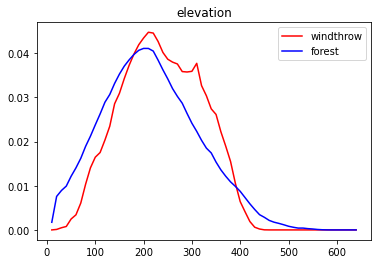

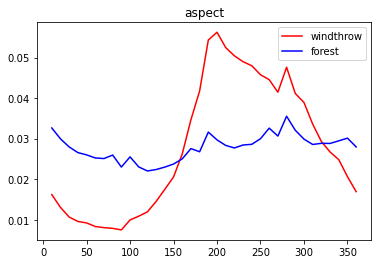

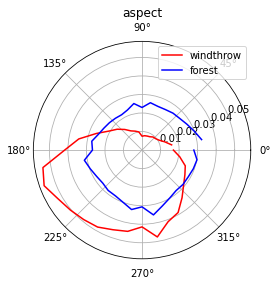

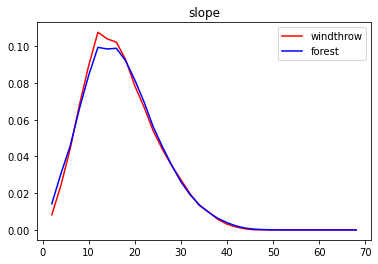

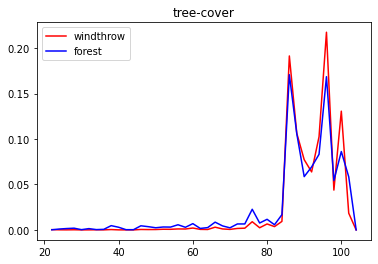

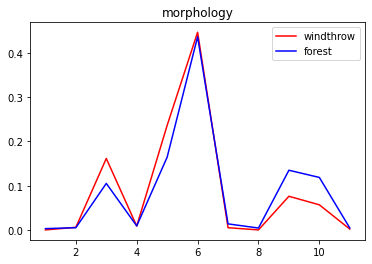

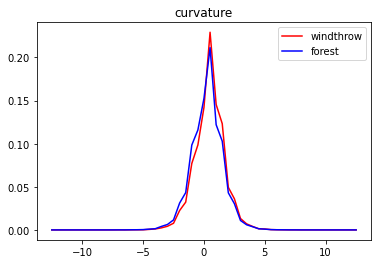

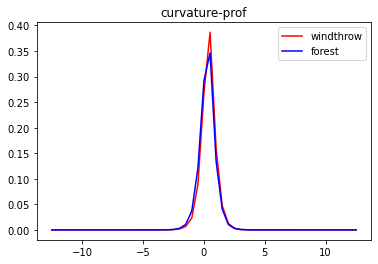

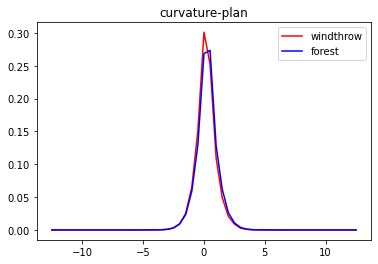

In [32]:
for feature in features:
    data=pd.read_csv(f'./{prefix}_0.4_{feature}.csv')
    plt.figure()
    plt.plot(feature_intervals[feature][1:],data.pr/data.pr.sum(), 'r', label='windthrow')
    plt.plot(feature_intervals[feature][1:], data.ft/data.ft.sum(), 'b', label='forest')
    plt.title(f"{feature}")
    plt.legend()
    if feature == 'aspect':
        plt.figure()
        plt.polar(feature_intervals[feature][1:]/180*np.pi, data.pr/data.pr.sum(), 'r', label='windthrow')
        plt.polar(feature_intervals[feature][1:]/180*np.pi, data.ft/data.ft.sum(), 'b', label='forest')
        plt.title(f"{feature}")
        plt.legend()
    